In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file C:\Users\goto\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...


C:\Users\goto\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [3]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


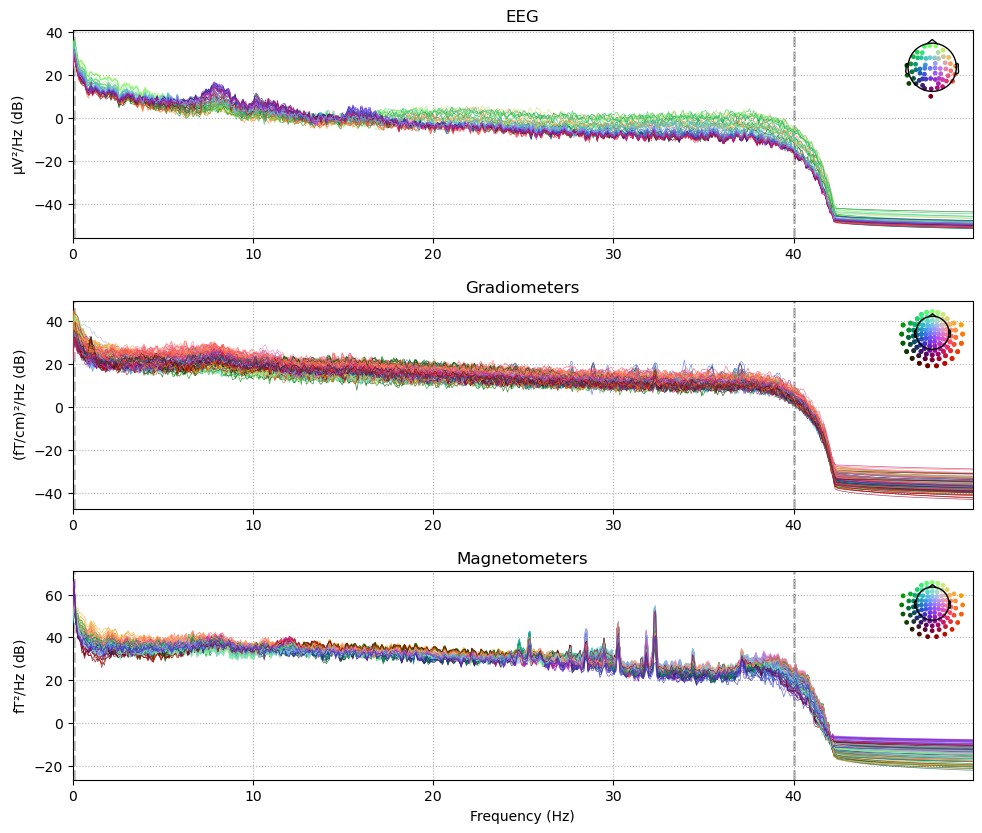

In [4]:
fig = raw.plot_psd(fmax=50, picks="data", exclude="bads")
fig.savefig('../figures/psd_plot.png')  # PNG形式で保存。必要に応じてファイル名や拡張子を変更

In [5]:
raw.plot(duration=5)

Using qt as 2D backend.
Opening raw-browser...


In [6]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif")
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(0, 60).load_data()  # just use a fraction of data for 

Opening raw data file C:\Users\goto\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.7 MB, data loaded>

In [7]:
ssp_projectors = raw.info["projs"]
raw.del_proj()

<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.6 MB, data loaded>

In [8]:
mag_channels = mne.pick_types(raw.info, meg="mag")
raw.plot(duration=60, order=mag_channels, n_channels=len(mag_channels), remove_dc=False)

Opening raw-browser...


Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


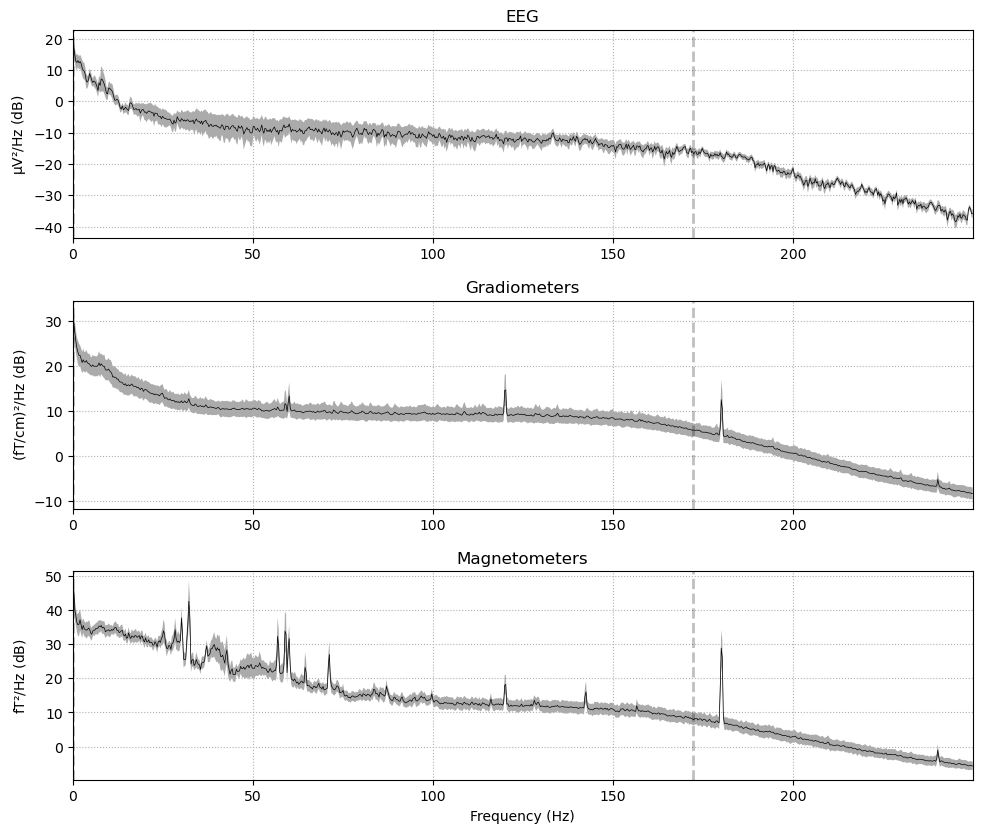

In [9]:
fig = raw.plot_psd(tmax=np.inf, fmax=250, average=True, picks="data", exclude="bads")
fig.savefig('../figures/mne-pre3.png')

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Number of ECG events detected : 59 (average pulse 58 / min.)
Not setting metadata
59 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 59 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
59 matching events found
No baseline correction applied
0 projection item

C:\Users\goto\anaconda3\lib\site-packages\mne\viz\epochs.py:543: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax['evoked'].get_shared_x_axes().join(ax['evoked'], ax_im)
C:\Users\goto\anaconda3\lib\site-packages\mne\viz\epochs.py:543: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax['evoked'].get_shared_x_axes().join(ax['evoked'], ax_im)


combining channels using "mean"


C:\Users\goto\anaconda3\lib\site-packages\mne\viz\epochs.py:543: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax['evoked'].get_shared_x_axes().join(ax['evoked'], ax_im)


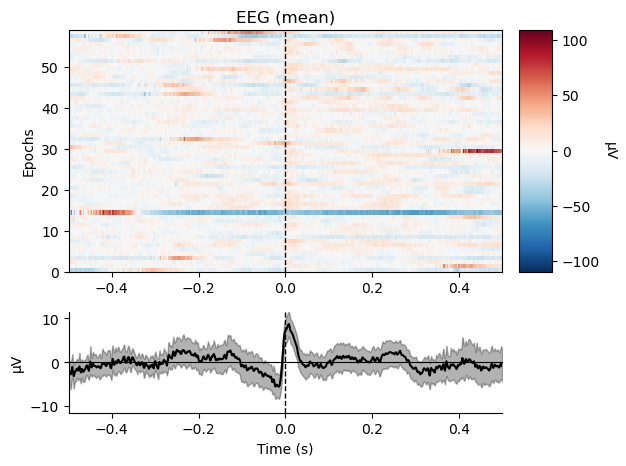

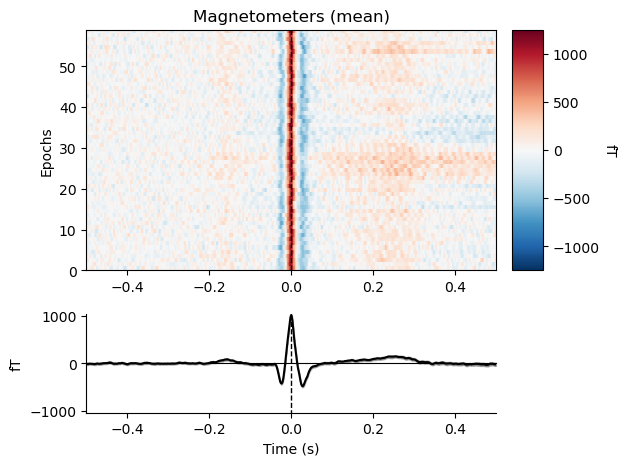

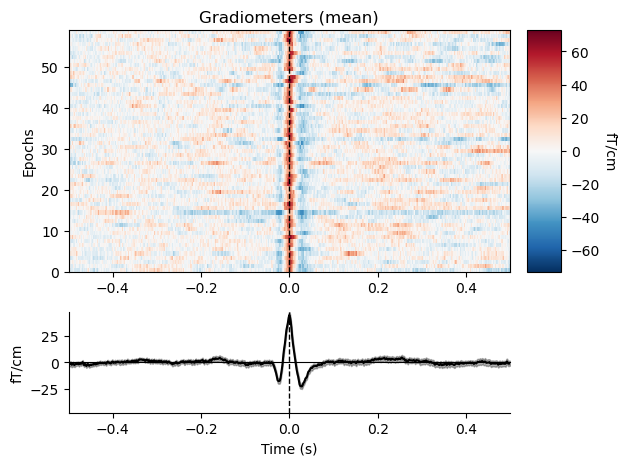

In [10]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw, baseline=(-0.5,-0.2))
fig = ecg_epochs.plot_image(combine="mean")


fig[0].savefig('../figures/mne-ecg11.png')
fig[1].savefig('../figures/mne-ecg21.png')
fig[2].savefig('../figures/mne-ecg31.png')

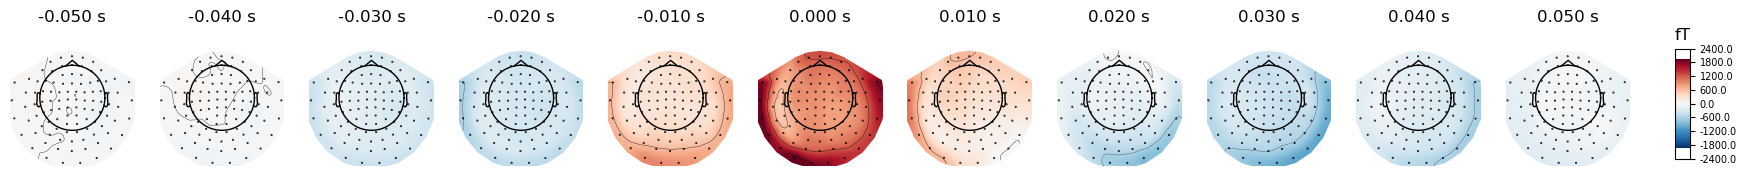

In [11]:
avg_ecg_epochs = ecg_epochs.average()
fig = avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11))
fig.savefig('../figures/mne-ecg6.png')

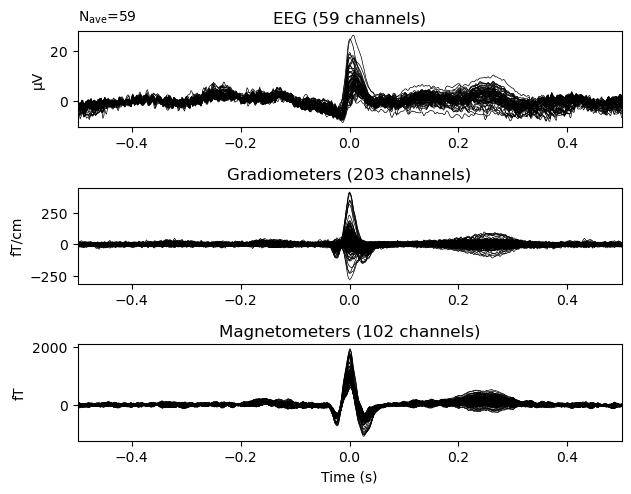

In [12]:
fig = avg_ecg_epochs.plot()

fig.savefig('../figures/mne-ecg7.png')

No projector specified for this dataset. Please consider the method self.add_proj.


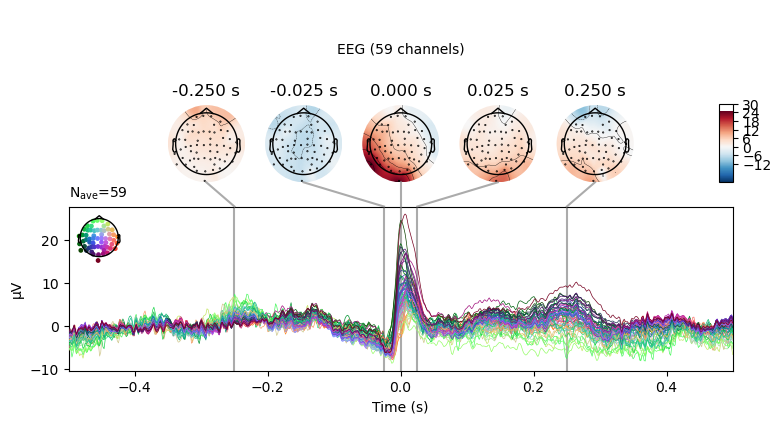

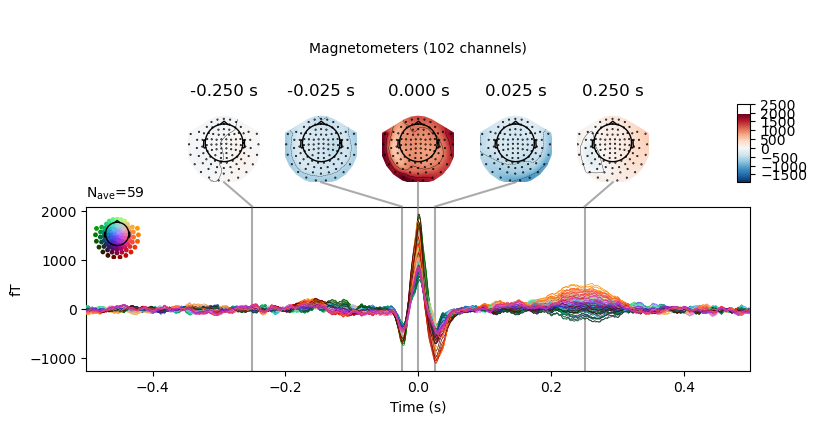

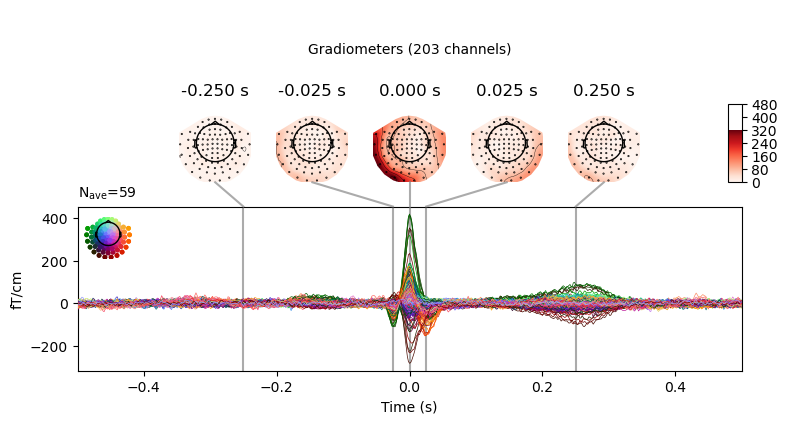

In [13]:
fig = avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25])

fig[0].savefig('../figures/mne-ecg12.png')
fig[1].savefig('../figures/mne-ecg22.png')
fig[2].savefig('../figures/mne-ecg32.png')

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected: 46
Not setting metadata
46 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
Loading data for 46 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
46 m

C:\Users\goto\anaconda3\lib\site-packages\mne\viz\epochs.py:543: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax['evoked'].get_shared_x_axes().join(ax['evoked'], ax_im)
C:\Users\goto\anaconda3\lib\site-packages\mne\viz\epochs.py:543: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax['evoked'].get_shared_x_axes().join(ax['evoked'], ax_im)


combining channels using "mean"


C:\Users\goto\anaconda3\lib\site-packages\mne\viz\epochs.py:543: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax['evoked'].get_shared_x_axes().join(ax['evoked'], ax_im)


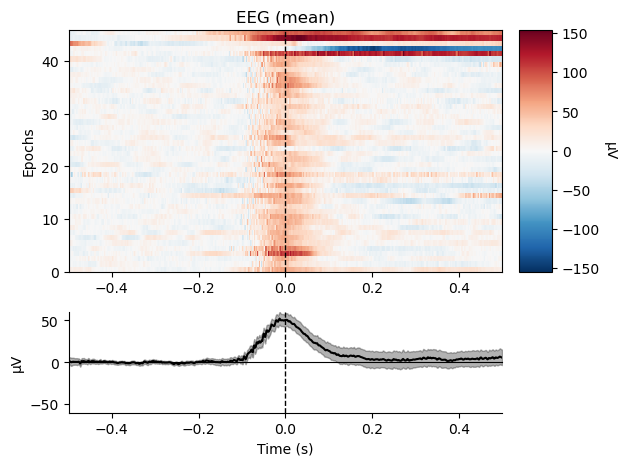

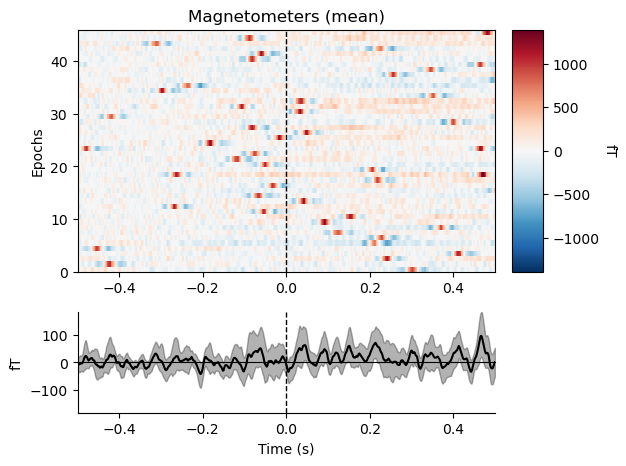

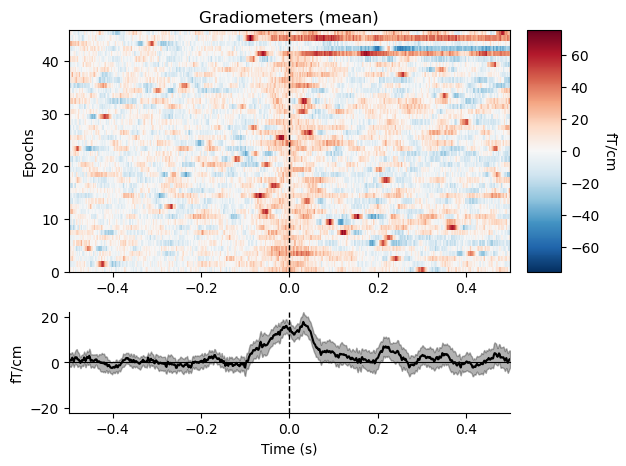

Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


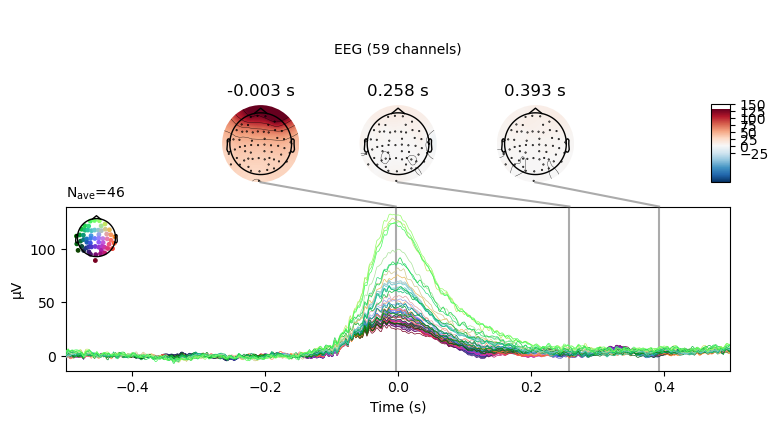

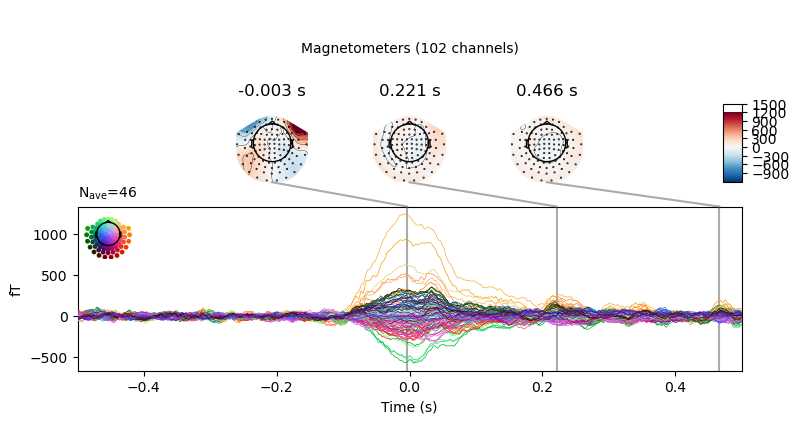

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


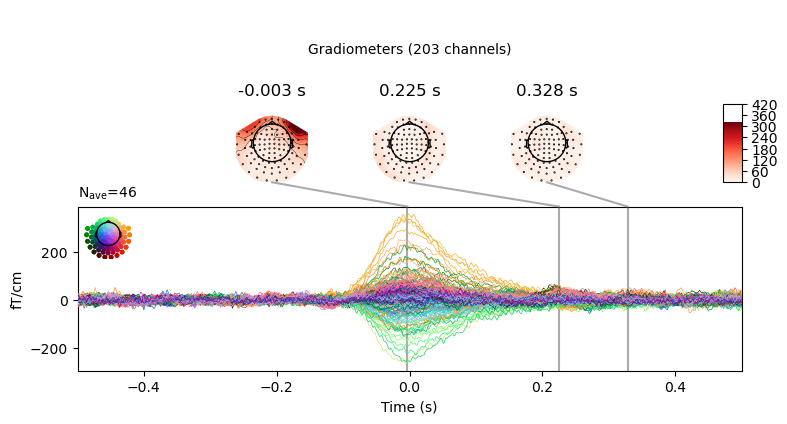

In [24]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
fig = eog_epochs.plot_image(combine="mean")
fig2 = eog_epochs.average().plot_joint()

fig[0].savefig('../figures/mne-ecg13.png')
fig[1].savefig('../figures/mne-ecg23.png')
fig[2].savefig('../figures/mne-ecg33.png')

fig2[0].savefig('../figures/mne-ecg14.png')
fig2[1].savefig('../figures/mne-ecg24.png')
fig2[2].savefig('../figures/mne-ecg34.png')

In [15]:
print(raw.info["bads"])

['MEG 2443', 'EEG 053']


In [16]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp="EEG 05.")
raw.plot(order=picks, n_channels=len(picks))

Opening raw-browser...


Closing raw-browser...
Channels marked as bad:
['MEG 2443', 'EEG 053']
Closing raw-browser...
Channels marked as bad:
['MEG 2443', 'EEG 053']
Closing raw-browser...
Channels marked as bad:
['MEG 2443', 'EEG 053']


In [17]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp="MEG 2..3")
raw.plot(order=picks, n_channels=len(picks))

Opening raw-browser...


Closing raw-browser...
Channels marked as bad:
['MEG 2443', 'EEG 053']


In [18]:
# default is exclude='bads':
good_eeg = mne.pick_types(raw.info, meg=False, eeg=True)
all_eeg = mne.pick_types(raw.info, meg=False, eeg=True, exclude=[])
print(np.setdiff1d(all_eeg, good_eeg))
print(np.array(raw.ch_names)[np.setdiff1d(all_eeg, good_eeg)])

[367]
['EEG 053']


320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


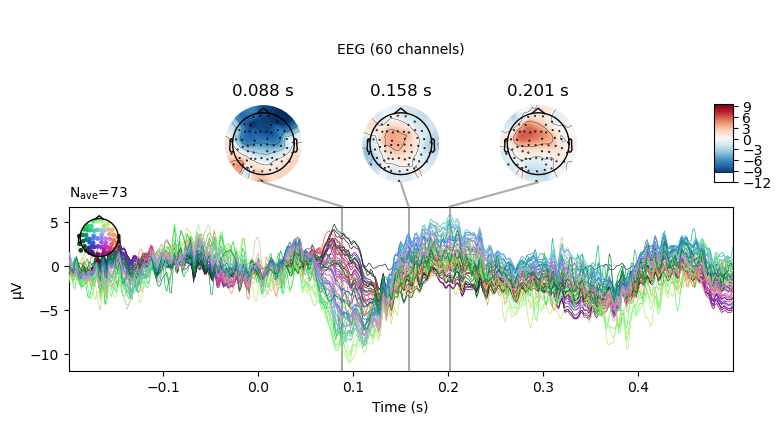

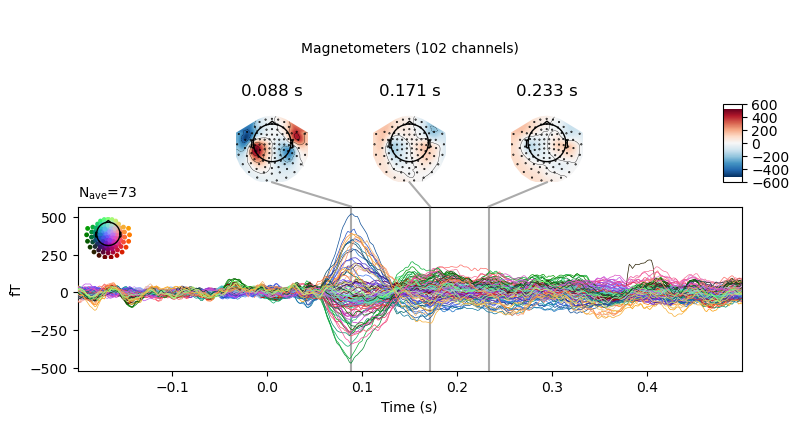

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


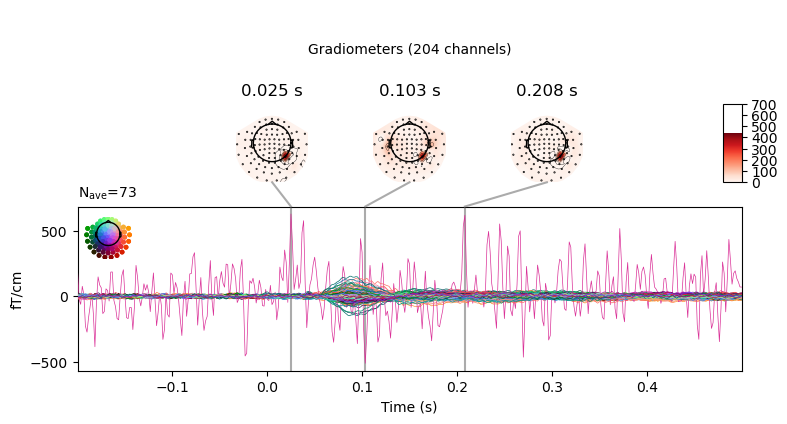

In [28]:
raw2 = raw.copy()
raw2.info["bads"] = []
events = mne.find_events(raw2, stim_channel="STI 014")
epochs = mne.Epochs(raw2, events=events)["2"].average().plot_joint()

epochs[0].savefig('../figures/mne-bc11.png')
epochs[1].savefig('../figures/mne-bc12.png')
epochs[2].savefig('../figures/mne-bc13.png')

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Interpolating bad channels
    Automatic origin fit: head of radius 91.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Using matplotlib as 2D backend.
Opening raw-browser...


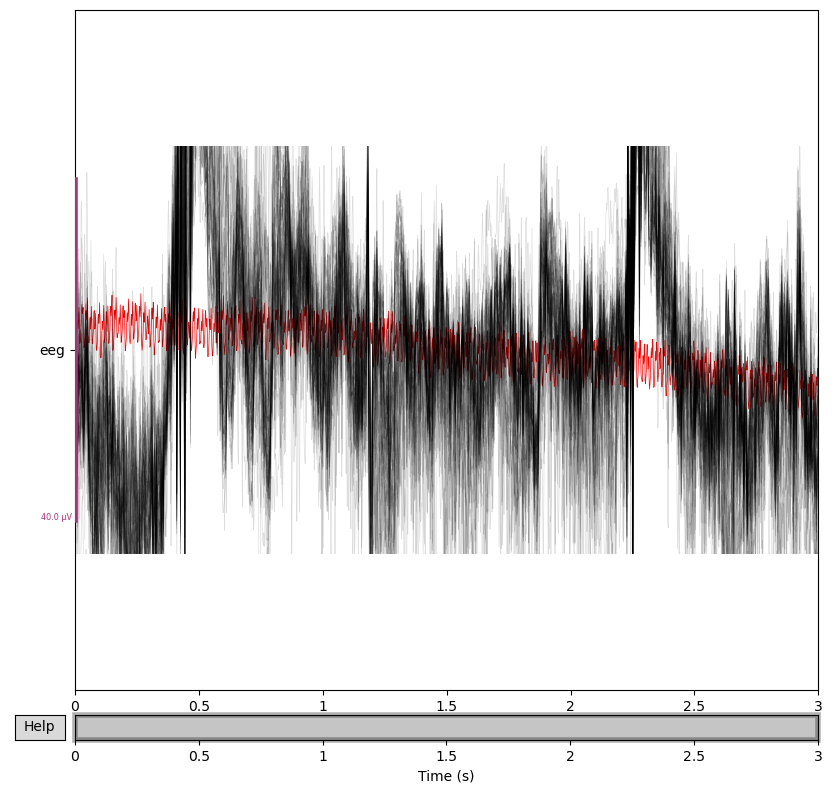

Using qt as 2D backend.
Using matplotlib as 2D backend.
Opening raw-browser...


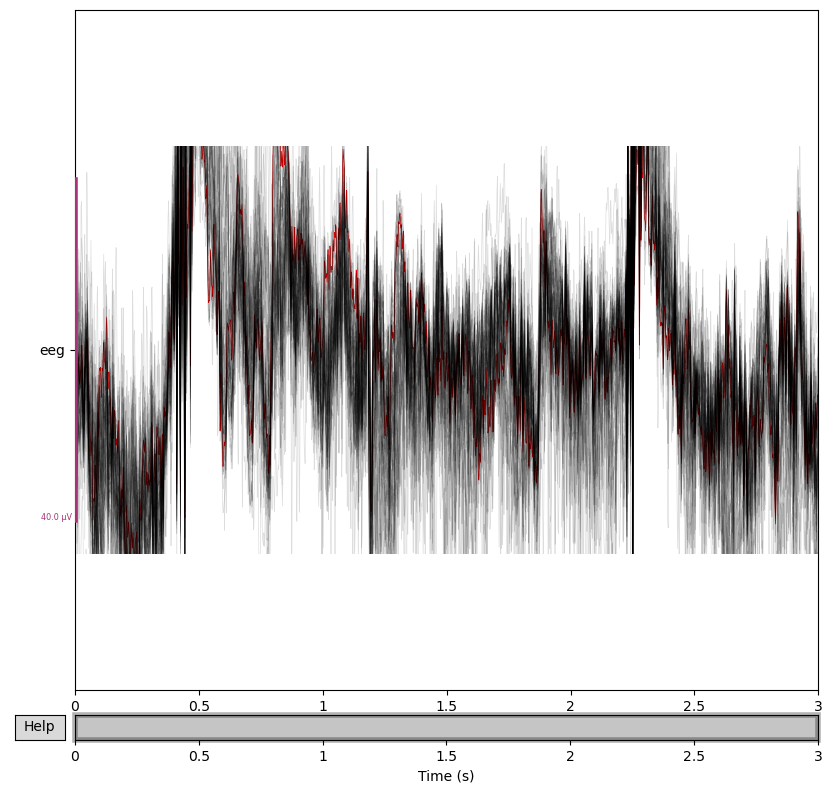

Using qt as 2D backend.


In [32]:
raw.crop(tmin=0, tmax=3).load_data()

eeg_data = raw.copy().pick_types(meg=False, eeg=True, exclude=[])
eeg_data_interp = eeg_data.copy().interpolate_bads(reset_bads=False)

for title, data in zip(["orig.", "interp."], [eeg_data, eeg_data_interp]):
    with mne.viz.use_browser_backend("matplotlib"):
        fig = data.plot(butterfly=True, color="#00000022", bad_color="r")
    fig.subplots_adjust(top=0.9)
    fig.suptitle(title, size="xx-large", weight="bold")
    fig.savefig('../figures/mne-bc5'+ title + '.png')